# Libaries and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Conjoint Analysis

/content/drive/MyDrive/Conjoint Analysis


In [3]:
#import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [4]:
#load data
df = pd.read_csv('netflix_customer_survey.csv')
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1


## data processing

In [5]:
# isolate X and y
y = df.selected
X = df.drop(columns = ['selected', 'customerid'])
X.head(2)

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show


In [6]:
# created dummy variables
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True


## Regression model

In [7]:
# build the regression model
model = sm.GLM(y,
               X_dummy,
               family = sm.families.Binomial()).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Sun, 08 Dec 2024   Deviance:                       3896.6
Time:                        15:44:25   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08371
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.7036      0.090     -7.813      0.000      -0.880      -0.527
NumberAccounts_2                -0.0720      0.089     -0.812      0.417      -0.246       0.102
NumberAccounts_3                -0.0220      0.088     -0.250      0.802      -0.194       0.150
NumberAccounts_4                 0.1252      0.083      1.500      0.134      -0.038       0.289
NumberAccounts_5                 0.1316      0.085      1.557      0.120      -0.034       0.297
NumberAccounts_6                 0.4956      0.082      6.042      0.000       0.335       0.656
price_8                          0.2964      0.085      3.491      0.000       0.130       0.463
price_10                         0.2202      0.087      2.529      0.011       0.050       0.391
price_12                         0.2014      0.082      2.449      0.014       0.040       0.363
price_15                         0.0197      0.084      0.235      0.815      -0.145       0.185
price_18                        -0.1026      0.087     -1.178      0.239      -0.273       0.068
price_20                        -0.6803      0.091     -7.515      0.000      -0.858      -0.503
ExtraContent_Disney              0.2274      0.087      2.608      0.009       0.057       0.398
ExtraContent_HBO                 0.2266      0.085      2.670      0.008       0.060       0.393
ExtraContent_Marvel              0.1451      0.084      1.728      0.084      -0.020       0.310
ExtraContent_Prime originals     0.1268      0.086      1.472      0.141      -0.042       0.296
ExtraContent_Soccer             -0.2046      0.085     -2.408      0.016      -0.371      -0.038
ExtraContent_less content       -0.5665      0.088     -6.408      0.000      -0.740      -0.393
ads_none                         0.2075      0.055      3.747      0.000       0.099       0.316
ads_one_per_day                  0.1088      0.056      1.933      0.053      -0.002       0.219
ads_one_per_show                -0.3615      0.057     -6.328      0.000      -0.473      -0.250
================================================================================================
"""

## Conjoint Analysis

In [8]:
# Create a DF with the results
df_result = pd.DataFrame({'param_name': model.params.keys(),
                        'partworth': model.params.values,
                        'pval': model.pvalues})
df_result

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-0.703558,5.575754e-15
NumberAccounts_2,NumberAccounts_2,-0.071964,4.170435e-01
NumberAccounts_3,NumberAccounts_3,-0.021969,8.022231e-01
NumberAccounts_4,NumberAccounts_4,0.125168,1.336233e-01
NumberAccounts_5,NumberAccounts_5,0.131611,1.195067e-01
NumberAccounts_6,NumberAccounts_6,0.495567,1.520723e-09
price_8,price_8,0.296450,4.816741e-04
price_10,price_10,0.220234,1.144243e-02
price_12,price_12,0.201383,1.433707e-02
price_15,price_15,0.019742,8.145491e-01


In [13]:
# identifying the statiscally significant variables

df_result['is_significant'] = (df_result['pval'] < 0.05)
df_result['color'] = ['blue' if X else 'red' for X in df_result['is_significant']]
df_result.head()

,param_name,partworth,pval,is_significant,color
NumberAccounts_1,NumberAccounts_1,-0.703558,5.575754e-15,True,blue
NumberAccounts_2,NumberAccounts_2,-0.071964,4.170435e-01,False,red
NumberAccounts_3,NumberAccounts_3,-0.021969,8.022231e-01,False,red
NumberAccounts_4,NumberAccounts_4,0.125168,1.336233e-01,False,red
NumberAccounts_5,NumberAccounts_5,0.131611,1.195067e-01,False,red


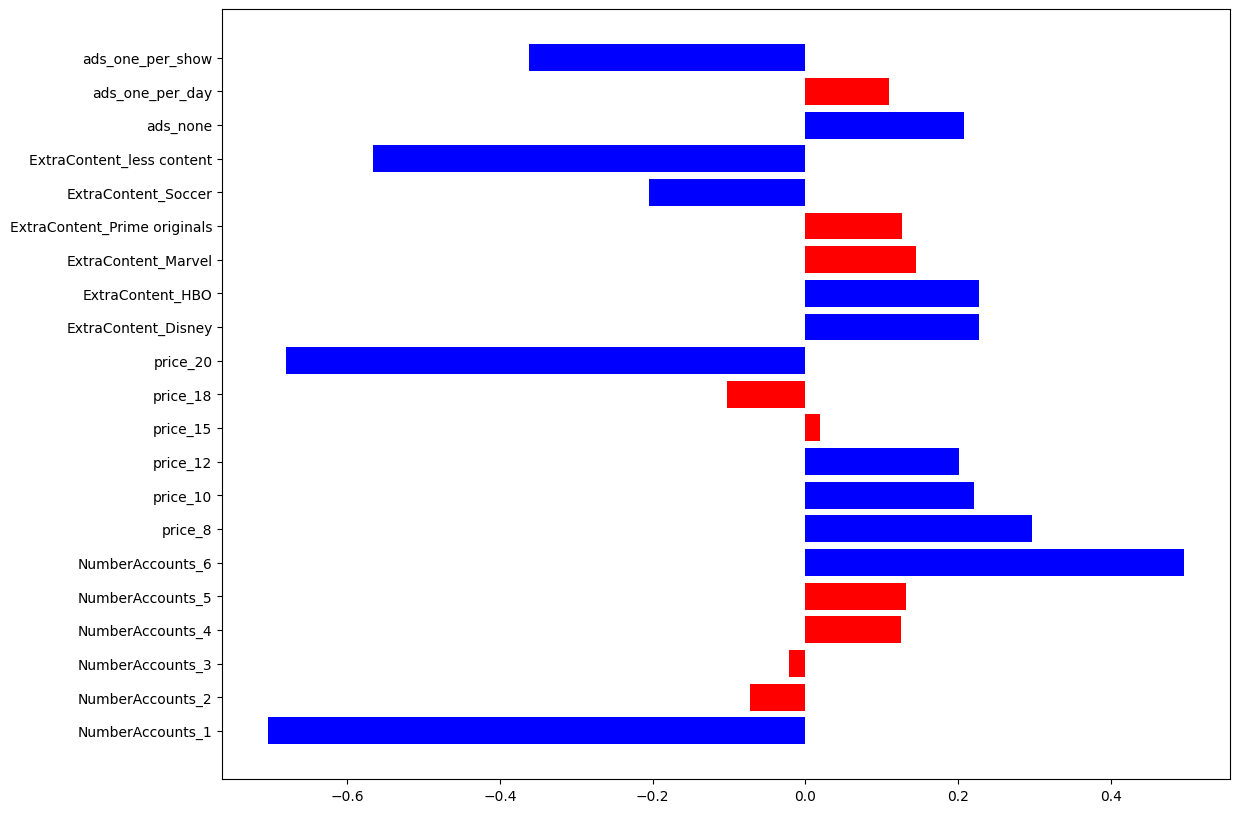

In [14]:
# Plot the partworth
f, ax = plt.subplots(figsize = (13, 10))
values = df_result.partworth
xbar = np.arange(len(values))

# bar plot
plt.barh(xbar,
         values,
         color = df_result['color'])

# customize the ticks
plt.yticks(xbar,
           labels = df_result['param_name'])
plt.show()